<a href="https://colab.research.google.com/github/naveenkumarch/CE888Lab/blob/main/Lab_8/Lab_08_FL%26FT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "chandranaveenkumar" # username from the json file
os.environ['KAGGLE_KEY'] = "45904676ae0159a225bbf34756b729fd" # key from the json file
!kaggle datasets download -d chandranaveenkumar/multiclass-classiifcation

 52% 10.0M/19.3M [00:00<00:00, 100MB/s]
100% 19.3M/19.3M [00:00<00:00, 94.1MB/s]


In [3]:
from zipfile import ZipFile
file_name = "/content/multiclass-classiifcation.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [7]:
data_dir_list = os.listdir('/content/data')
#print(data_dir_list)
path, dirs, files = next(os.walk("/content/data"))

/content/data
['dogs', 'horses', 'Humans', 'cats']
0


In [11]:
categories = {} 
for i in dirs:
  categories[i] = dirs.index(i)
print(categories)


{'dogs': 0, 'horses': 1, 'Humans': 2, 'cats': 3}


In [48]:
import cv2
import numpy as np
from random import shuffle
import tensorflow as tf 
from tensorflow.keras.utils import to_categorical

In [49]:
from google.colab.patches import cv2_imshow

images= []       # Varaible for paths
y = []      # Variable for containg Labels of Images
for dir in dirs:
    for dirname, _, filenames in os.walk(path+'/'+dir):
        #print(len(filenames))
        for filename in filenames:
            #print(filename)
            file_path = str(path+'/'+dir+'/'+filename)
            image = cv2.resize(cv2.imread(file_path), (224, 224))
            #cv2_imshow(image)
            image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
            images.append(np.array(image))
            #imread function loads image in BGR format by default instead of RGB format. 
            y.append(categories[str(dir)])
            # Assining the respective image a label based on which directory it is present
images = np.array(images)
y =np.array(to_categorical(y,num_classes=4))

In [50]:
from sklearn.model_selection import train_test_split
Traval_images, test_images, Traval_labels, test_labels = train_test_split(images, y,
                                                    stratify=y, 
                                                    test_size=0.2)

In [51]:
train_images,validation_images,train_labels,validation_labels = train_test_split(Traval_images,Traval_labels,
                                                    stratify=Traval_labels, 
                                                    test_size=0.2)

In [52]:
print("No of images in trainig:", len(train_images))
print("No of images in Validation:",len(validation_images))
print("No of images in Testing:",len(test_images))

No of images in trainig: 516
No of images in Validation: 130
No of images in Testing: 162


In [66]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Input,GlobalAveragePooling2D
from tensorflow.keras import Model

img_input = Input(shape=(224, 224, 3))

In [34]:
model = InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    )
model.summary()

96116736/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________

In [39]:
last_layer = model.get_layer('avg_pool').output
out = Dense(4, activation='softmax', name='output')(last_layer)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [54]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [55]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [56]:
history = model.fit(train_images, train_labels,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(validation_images, validation_labels),
                               callbacks=my_callbacks)

Epoch 1/10
52/52 [==============================] - 75s 1s/step - loss: 0.8665 - acc: 0.6701 - val_loss: 0.2095 - val_acc: 0.9462
Epoch 2/10
52/52 [==============================] - 69s 1s/step - loss: 0.0953 - acc: 0.9751 - val_loss: 0.1527 - val_acc: 0.9462
Epoch 3/10
52/52 [==============================] - 69s 1s/step - loss: 0.0569 - acc: 0.9933 - val_loss: 0.1249 - val_acc: 0.9615
Epoch 4/10
52/52 [==============================] - 71s 1s/step - loss: 0.0305 - acc: 0.9995 - val_loss: 0.1298 - val_acc: 0.9615
Epoch 5/10
52/52 [==============================] - 71s 1s/step - loss: 0.0252 - acc: 1.0000 - val_loss: 0.1042 - val_acc: 0.9615
Epoch 6/10
52/52 [==============================] - 72s 1s/step - loss: 0.0187 - acc: 1.0000 - val_loss: 0.1109 - val_acc: 0.9692
Epoch 7/10
52/52 [==============================] - 71s 1s/step - loss: 0.0131 - acc: 1.0000 - val_loss: 0.1140 - val_acc: 0.9615
Epoch 8/10
52/52 [==============================] - 71s 1s/step - loss: 0.0108 - acc: 1.00

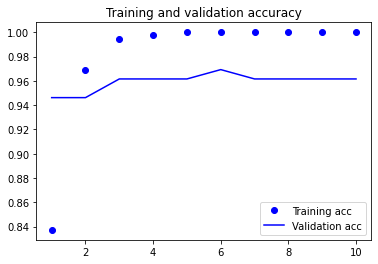

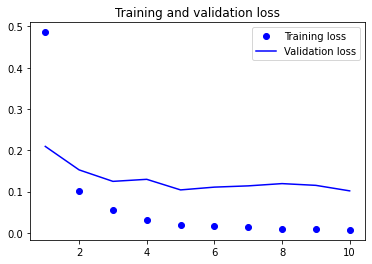

In [57]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [61]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

6/6 [==============================] - 17s 3s/step - loss: 0.0773 - acc: 0.9815


In [62]:
print("Accuracy on test data:", test_acc)

Accuracy on test data: 0.9814814925193787


In [68]:
base_model = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    )
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 111, 111, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 111, 111, 32) 0           batch_normalization_282[0][0]    
_______________________________________________________________________________________

In [73]:
base_last_layer = base_model.get_layer('mixed10').output
x= GlobalAveragePooling2D(name='Avg')(base_last_layer)
out = Dense(4, activation='softmax', name='output')(x)  ## 2 classes
model_FT = Model(img_input, out)

for layer in model_FT.layers[:-2]:
	layer.trainable = False

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [75]:
model_FT.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [76]:
history_FT = model_FT.fit(train_images, train_labels,
                               batch_size=20,
                               epochs=10, 
                               validation_data=(validation_images, validation_labels),
                               callbacks=my_callbacks)

Epoch 1/10
26/26 [==============================] - 72s 3s/step - loss: 1.0197 - acc: 0.5940 - val_loss: 0.2624 - val_acc: 0.9077
Epoch 2/10
26/26 [==============================] - 67s 3s/step - loss: 0.1711 - acc: 0.9601 - val_loss: 0.1677 - val_acc: 0.9615
Epoch 3/10
26/26 [==============================] - 67s 3s/step - loss: 0.1069 - acc: 0.9701 - val_loss: 0.1355 - val_acc: 0.9692
Epoch 4/10
26/26 [==============================] - 66s 3s/step - loss: 0.0684 - acc: 0.9853 - val_loss: 0.1286 - val_acc: 0.9615
Epoch 5/10
26/26 [==============================] - 66s 3s/step - loss: 0.0403 - acc: 1.0000 - val_loss: 0.1198 - val_acc: 0.9769
Epoch 6/10
26/26 [==============================] - 66s 3s/step - loss: 0.0308 - acc: 0.9987 - val_loss: 0.1178 - val_acc: 0.9692
Epoch 7/10
26/26 [==============================] - 66s 3s/step - loss: 0.0281 - acc: 1.0000 - val_loss: 0.1080 - val_acc: 0.9769
Epoch 8/10
26/26 [==============================] - 66s 3s/step - loss: 0.0211 - acc: 1.00

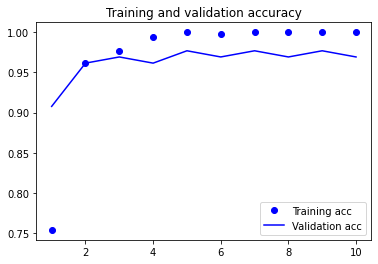

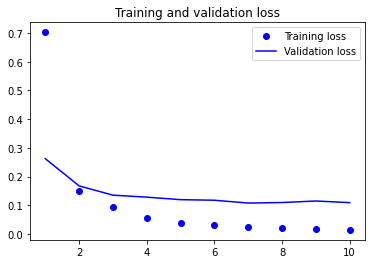

In [77]:
import matplotlib.pyplot as plt

acc_FT = history_FT.history['acc']
val_acc_FT = history_FT.history['val_acc']
loss_FT = history_FT.history['loss']
val_loss_FT = history_FT.history['val_loss']

epochs = range(1, len(acc_FT) + 1)

plt.plot(epochs, acc_FT, 'bo', label='Training acc')
plt.plot(epochs, val_acc_FT, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_FT, 'bo', label='Training loss')
plt.plot(epochs, val_loss_FT, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [78]:
test_loss, test_acc = model_FT.evaluate(test_images,test_labels)

6/6 [==============================] - 17s 3s/step - loss: 0.0856 - acc: 0.9815
